In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d janmejaybhoi/cotton-disease-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cotton-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/cotton-disease-dataset.zip

In [ ]:
# importing liraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3

In [ ]:
Inception_V3 = tf.keras.applications.InceptionV3(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224, 224, 3))

In [ ]:
Inception_V3.trainable = False

In [ ]:
num_classes = 4  # Replace with the actual number of classes
model = Sequential()
model.add(Inception_V3)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Use num_classes instead of 1

In [ ]:
# data augmentation
batch_size = 64

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/Cotton Disease/train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/Cotton Disease/test',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs = 10,  # You might need more epochs for fine-tuning
                    validation_data = validation_generator)

Epoch 1/10
31/31 [==============================] - 43s 1s/step - loss: 11.9442 - accuracy: 0.5874 - val_loss: 0.8022 - val_accuracy: 0.6698
Epoch 2/10
31/31 [==============================] - 30s 950ms/step - loss: 0.4717 - accuracy: 0.8452 - val_loss: 0.4152 - val_accuracy: 0.8491
Epoch 3/10
31/31 [==============================] - 29s 938ms/step - loss: 0.2681 - accuracy: 0.9093 - val_loss: 0.2157 - val_accuracy: 0.9057
Epoch 4/10
31/31 [==============================] - 32s 1s/step - loss: 0.2143 - accuracy: 0.9236 - val_loss: 0.1714 - val_accuracy: 0.9340
Epoch 5/10
31/31 [==============================] - 36s 1s/step - loss: 0.1788 - accuracy: 0.9385 - val_loss: 0.1400 - val_accuracy: 0.9434
Epoch 6/10
31/31 [==============================] - 30s 933ms/step - loss: 0.1747 - accuracy: 0.9375 - val_loss: 0.0752 - val_accuracy: 1.0000
Epoch 7/10
31/31 [==============================] - 31s 995ms/step - loss: 0.1405 - accuracy: 0.9508 - val_loss: 0.1106 - val_accuracy: 0.9811
Epoch 8

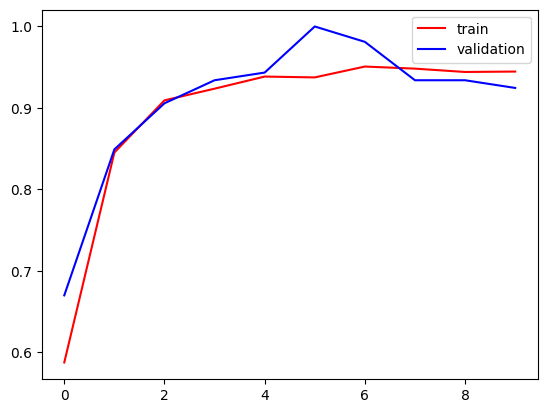

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

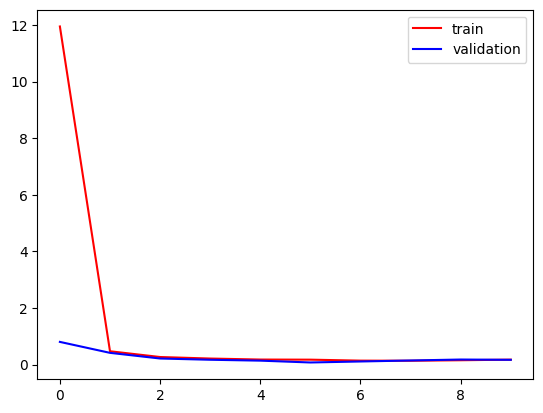

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Save model architecture as JSON
model_json = model.to_json()
with open("CottonDiseaseDetection_model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights
model.save_weights("CottonDiseaseDetection_model.h5")